In [1]:
# 📦 필수 라이브러리 Import
import sys
import os
from pathlib import Path
import warnings

# 프로젝트 루트 경로를 Python path에 추가 (notebooks 폴더에서 실행시 상위 디렉토리)
project_root = Path().absolute().parent  # notebooks의 상위 디렉토리
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
print(f"🔧 프로젝트 루트 경로: {project_root}")
print(f"📂 Python path에 추가됨: {str(project_root) in sys.path}")

# 경고 메시지 필터링 (깨끗한 출력을 위해)
warnings.filterwarnings('ignore')

# 데이터 처리 및 분석
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜 처리
from datetime import datetime, timedelta

# 프로젝트 모듈
try:
    from src.data_generation.data_generator import DataGenerator
    from src.utils.config_loader import load_config
    from src.utils.logger import get_logger
    print("✅ 프로젝트 모듈 import 성공")
except ImportError as e:
    print(f"⚠️  프로젝트 모듈 import 실패: {e}")
    print("현재 작업 디렉토리를 확인하고 프로젝트 루트에서 실행하세요.")

# 시각화 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# matplotlib 폰트 경고 제거
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 한글 폰트 설정 (Windows) - 경고 없는 버전
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕만 사용
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 설정
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'DejaVu Sans'
    
print(f"🎨 설정된 폰트: {plt.rcParams['font.family']}")
print(f"🖥️ 운영체제: {platform.system()}")

# 폰트 목록 확인 (필요시 주석 해제)
# from matplotlib import font_manager
# fonts = [f.name for f in font_manager.fontManager.ttflist if 'Gothic' in f.name or 'Malgun' in f.name]
# print(f"🔍 사용 가능한 한글 폰트: {fonts[:3]}")  # 처음 3개만 출력

# 폰트 캐시 초기화 (한글이 여전히 안 보인다면 실행)
# import matplotlib.font_manager as fm
# fm._rebuild()
# print("🔄 폰트 캐시 재설정 완료")

# pandas 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("🔧 환경 설정 완료!")
print(f"📍 현재 작업 디렉토리: {os.getcwd()}")
print(f"📊 pandas 버전: {pd.__version__}")
print(f"🔢 numpy 버전: {np.__version__}")


🔧 프로젝트 루트 경로: c:\Users\SeokHyun\Desktop\Coding\Leet\Portfolio\DS-Project1
📂 Python path에 추가됨: True
설정 파일 로드 완료: c:\Users\SeokHyun\Desktop\Coding\Leet\Portfolio\DS-Project1\config\config.yaml
설정 파일 로드 완료: c:\Users\SeokHyun\Desktop\Coding\Leet\Portfolio\DS-Project1\config\config.yaml
2025-06-30 16:57:03 - src - INFO - __init__.py:41 - E-commerce Analytics Platform v1.0.0 초기화 완료
✅ 프로젝트 모듈 import 성공
🎨 설정된 폰트: ['Malgun Gothic']
🖥️ 운영체제: Windows
🔧 환경 설정 완료!
📍 현재 작업 디렉토리: c:\Users\SeokHyun\Desktop\Coding\Leet\Portfolio\DS-Project1\notebooks
📊 pandas 버전: 2.2.2
🔢 numpy 버전: 1.26.4


In [2]:
# 🎛️ 데이터 생성 설정
config = {
    'n_customers': 1000,      # 고객 수
    'n_products': 100,        # 상품 수  
    'n_orders': 5000,         # 주문 수
    'start_date': '2023-01-01',   # 시작 날짜
    'end_date': '2024-12-31',     # 종료 날짜
    'seasonality_strength': 0.3,  # 계절성 강도
    'trend_strength': 0.2         # 트렌드 강도
}

print("📊 데이터 생성 설정:")
for key, value in config.items():
    print(f"  {key}: {value}")

# 🏭 데이터 생성기 초기화
print("\n🏭 데이터 생성기 초기화 중...")
generator = DataGenerator(config=config, random_seed=42)

print("\n✅ 데이터 생성기 준비 완료!")
print("⏰ 예상 소요 시간: 약 10-30초")


📊 데이터 생성 설정:
  n_customers: 1000
  n_products: 100
  n_orders: 5000
  start_date: 2023-01-01
  end_date: 2024-12-31
  seasonality_strength: 0.3
  trend_strength: 0.2

🏭 데이터 생성기 초기화 중...
데이터 생성기 초기화 완료
- 고객: 1,000명
- 상품: 100개
- 주문: 5,000건

✅ 데이터 생성기 준비 완료!
⏰ 예상 소요 시간: 약 10-30초


In [3]:
# 🚀 데이터 생성 실행
print("🚀 데이터 생성을 시작합니다...\n")

# 모든 데이터 생성 (파일 저장 포함)
data = generator.generate_all(save_to_file=True)

# 생성된 데이터 확인
customers_df = data['customers']
products_df = data['products'] 
orders_df = data['orders']
order_items_df = data['order_items']

print("\n" + "="*50)
print("🎉 데이터 생성 완료!")
print("="*50)

# 생성된 데이터 요약
print(f"📊 생성된 데이터 요약:")
print(f"  👥 고객: {len(customers_df):,}명")
print(f"  📦 상품: {len(products_df):,}개")
print(f"  🛒 주문: {len(orders_df):,}건")
print(f"  📋 주문상품: {len(order_items_df):,}건")

# 파일 저장 위치 확인
data_dir = Path('data/raw')
if data_dir.exists():
    files = list(data_dir.glob('*.csv'))
    print(f"\n💾 저장된 파일 ({len(files)}개):")
    for file in files:
        file_size = file.stat().st_size / 1024  # KB
        print(f"  📄 {file.name}: {file_size:.1f} KB")
else:
    print("\n⚠️  data/raw 디렉토리를 찾을 수 없습니다.")


🚀 데이터 생성을 시작합니다...


=== E-commerce 데이터 생성 시작 ===
고객 데이터 생성 중...
고객 데이터 생성 완료: 1,000건
상품 데이터 생성 중...
상품 데이터 생성 완료: 100건
주문 데이터 생성 중...
주문 데이터 생성 완료: 5,000건
주문 상품 데이터 생성 완료: 6,984건
데이터 파일 저장 중 (data/raw)...
파일 저장 완료 ✓

=== 데이터 생성 완료 ===

🎉 데이터 생성 완료!
📊 생성된 데이터 요약:
  👥 고객: 1,000명
  📦 상품: 100개
  🛒 주문: 5,000건
  📋 주문상품: 6,984건

💾 저장된 파일 (4개):
  📄 customers.csv: 52.2 KB
  📄 orders.csv: 297.8 KB
  📄 order_items.csv: 476.8 KB
  📄 products.csv: 7.8 KB


In [4]:
# 👥 고객 데이터 기본 정보
print("👥 고객 데이터 기본 정보")
print("="*50)
print(f"📊 데이터 크기: {customers_df.shape[0]:,}행 × {customers_df.shape[1]}열")
print(f"💾 메모리 사용량: {customers_df.memory_usage(deep=True).sum() / 1024:.1f} KB")
print()

# 🔍 데이터 구조 확인
print("🔍 데이터 구조:")
print(customers_df.info())
print()

# 📋 첫 5행 미리보기
print("📋 데이터 미리보기 (첫 5행):")
print(customers_df.head())
print()

# 📈 기본 통계
print("📈 수치형 변수 기본 통계:")
print(customers_df.describe())


👥 고객 데이터 기본 정보
📊 데이터 크기: 1,000행 × 7열
💾 메모리 사용량: 347.2 KB

🔍 데이터 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        1000 non-null   object
 1   name               1000 non-null   object
 2   age                1000 non-null   int64 
 3   gender             1000 non-null   object
 4   region             1000 non-null   object
 5   segment            1000 non-null   object
 6   registration_date  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None

📋 데이터 미리보기 (첫 5행):
   customer_id name  age gender region  segment registration_date
0  CUST_000001  이민준   47      F     인천  Premium        2023-09-01
1  CUST_000002  이지민   37      M     경기      VIP        2024-09-27
2  CUST_000003  최도윤   49      M     인천  Regular        2022-07-26
3  CUST_000004  임시우   62      M     대구  Regular        2022-07-2

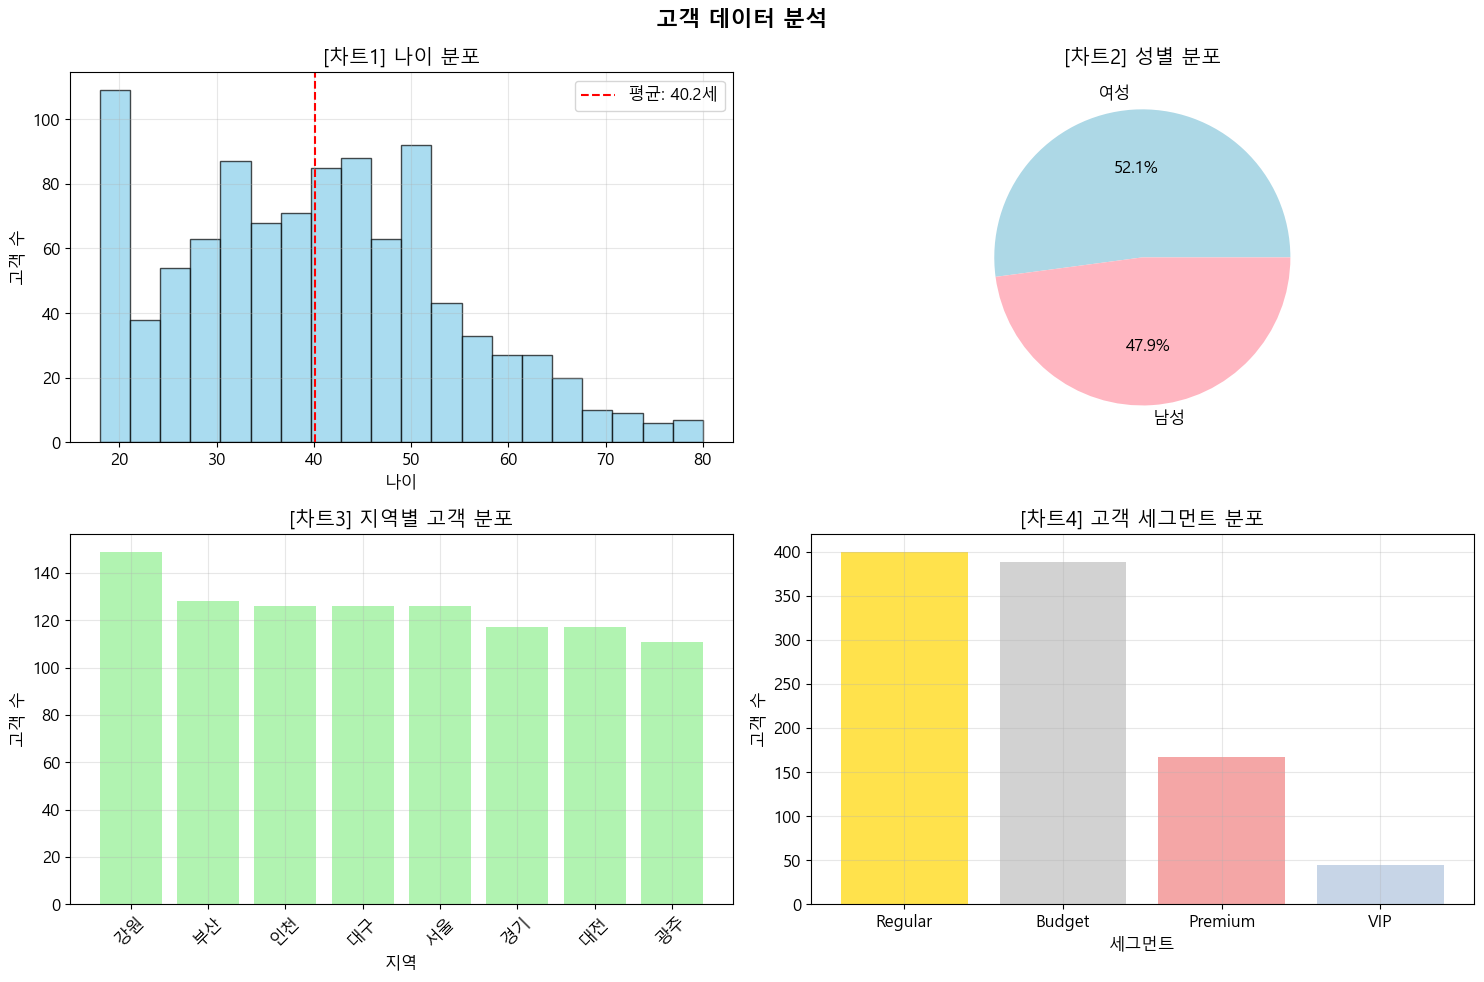


📊 범주형 변수 분포:

👫 성별 분포:
gender
F    521
M    479
Name: count, dtype: int64

🗺️ 지역 분포:
region
강원    149
부산    128
인천    126
대구    126
서울    126
경기    117
대전    117
광주    111
Name: count, dtype: int64

🎯 세그먼트 분포:
segment
Regular    400
Budget     388
Premium    167
VIP         45
Name: count, dtype: int64


In [5]:
# 고객 데이터 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('고객 데이터 분석', fontsize=16, fontweight='bold')

# 1. 나이 분포
axes[0, 0].hist(customers_df['age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('[차트1] 나이 분포')
axes[0, 0].set_xlabel('나이')
axes[0, 0].set_ylabel('고객 수')
axes[0, 0].axvline(customers_df['age'].mean(), color='red', linestyle='--', 
                   label=f'평균: {customers_df["age"].mean():.1f}세')
axes[0, 0].legend()

# 2. 성별 분포
gender_counts = customers_df['gender'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=['남성' if x=='M' else '여성' for x in gender_counts.index], 
               autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
axes[0, 1].set_title('[차트2] 성별 분포')

# 3. 지역 분포
region_counts = customers_df['region'].value_counts()
axes[1, 0].bar(region_counts.index, region_counts.values, color='lightgreen', alpha=0.7)
axes[1, 0].set_title('[차트3] 지역별 고객 분포')
axes[1, 0].set_xlabel('지역')
axes[1, 0].set_ylabel('고객 수')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. 고객 세그먼트 분포
segment_counts = customers_df['segment'].value_counts()
colors = ['gold', 'silver', 'lightcoral', 'lightsteelblue']
axes[1, 1].bar(segment_counts.index, segment_counts.values, color=colors, alpha=0.7)
axes[1, 1].set_title('[차트4] 고객 세그먼트 분포')
axes[1, 1].set_xlabel('세그먼트')
axes[1, 1].set_ylabel('고객 수')

# 💄 레이아웃 조정
plt.tight_layout()
plt.show()

# 📊 범주형 변수 요약 통계
print("\n📊 범주형 변수 분포:")
print("\n👫 성별 분포:")
print(customers_df['gender'].value_counts())
print("\n🗺️ 지역 분포:")
print(customers_df['region'].value_counts())
print("\n🎯 세그먼트 분포:")
print(customers_df['segment'].value_counts())


In [6]:
# 📦 상품 데이터 기본 정보
print("📦 상품 데이터 기본 정보")
print("="*50)
print(f"📊 데이터 크기: {products_df.shape[0]:,}행 × {products_df.shape[1]}열")
print()

# 📋 첫 5행 미리보기
print("📋 데이터 미리보기 (첫 5행):")
print(products_df.head())
print()

# 📈 가격 관련 기본 통계
print("📈 가격 관련 기본 통계:")
print(products_df[['price', 'discount_rate', 'final_price', 'stock']].describe())
print()

# 📊 범주형 변수 분포
print("📊 범주형 변수 분포:")
print("\n🏷️ 카테고리별 상품 수:")
print(products_df['category'].value_counts())
print("\n🏭 브랜드별 상품 수:")
print(products_df['brand'].value_counts())


📦 상품 데이터 기본 정보
📊 데이터 크기: 100행 × 8열

📋 데이터 미리보기 (첫 5행):
    product_id  product_name category brand   price  discount_rate  \
0  PROD_000001  LG 생활용품 상품 1     생활용품    LG  120000              0   
1  PROD_000002   나이키 가전 상품 2       가전   나이키  232000              5   
2  PROD_000003    애플 가전 상품 3       가전    애플  713000              0   
3  PROD_000004    삼성 가전 상품 4       가전    삼성  347000              0   
4  PROD_000005  아디다스 뷰티 상품 5       뷰티  아디다스  181000              0   

   final_price  stock  
0       120000    352  
1       220400    957  
2       713000    506  
3       347000    748  
4       181000    775  

📈 가격 관련 기본 통계:
           price  discount_rate  final_price  stock
count     100.00         100.00       100.00 100.00
mean   486200.00           5.60    468291.98 526.57
std    622229.50           9.88    611945.54 285.93
min     11000.00           0.00      9350.00  42.00
25%    146750.00           0.00    120000.00 306.00
50%    226500.00           0.00    199000.00 506.00


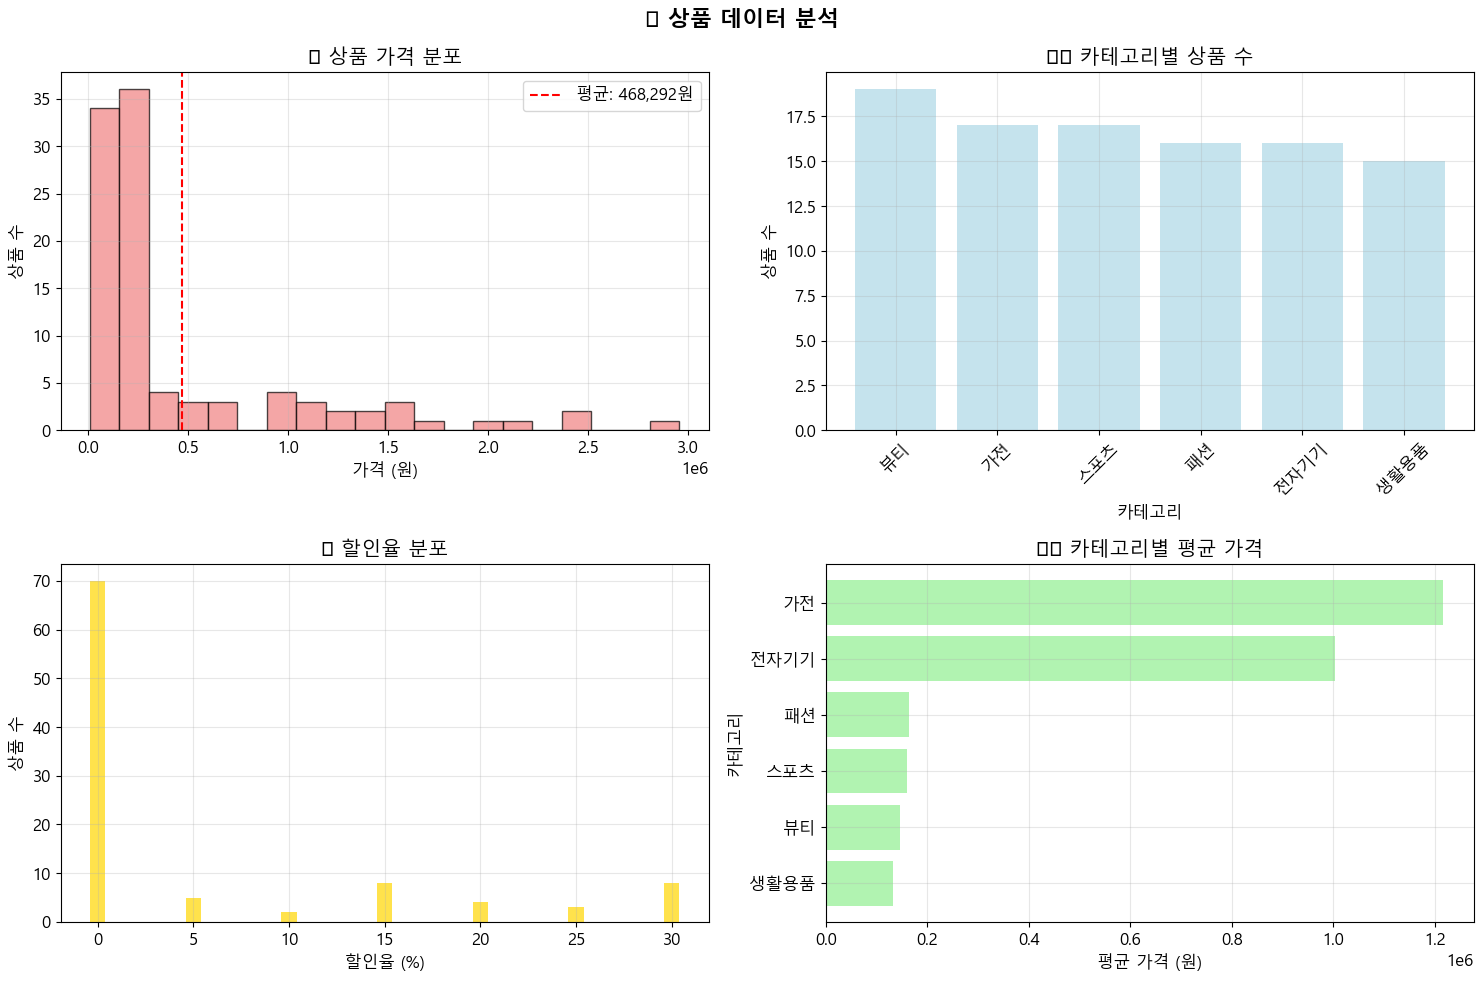


💡 상품 데이터 주요 인사이트:
📊 가장 비싼 카테고리: 가전 (1,216,018원)
📊 가장 저렴한 카테고리: 생활용품 (133,087원)
🎯 할인 상품 비율: 30.0%
💰 전체 평균 가격: 468,292원


In [7]:
# 📦 상품 데이터 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📦 상품 데이터 분석', fontsize=16, fontweight='bold')

# 1️⃣ 최종 가격 분포
axes[0, 0].hist(products_df['final_price'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('💰 상품 가격 분포')
axes[0, 0].set_xlabel('가격 (원)')
axes[0, 0].set_ylabel('상품 수')
axes[0, 0].axvline(products_df['final_price'].mean(), color='red', linestyle='--',
                   label=f'평균: {products_df["final_price"].mean():,.0f}원')
axes[0, 0].legend()

# 2️⃣ 카테고리별 상품 수
category_counts = products_df['category'].value_counts()
axes[0, 1].bar(category_counts.index, category_counts.values, color='lightblue', alpha=0.7)
axes[0, 1].set_title('🏷️ 카테고리별 상품 수')
axes[0, 1].set_xlabel('카테고리')
axes[0, 1].set_ylabel('상품 수')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3️⃣ 할인율 분포
discount_counts = products_df['discount_rate'].value_counts().sort_index()
axes[1, 0].bar(discount_counts.index, discount_counts.values, color='gold', alpha=0.7)
axes[1, 0].set_title('🎯 할인율 분포')
axes[1, 0].set_xlabel('할인율 (%)')
axes[1, 0].set_ylabel('상품 수')

# 4️⃣ 카테고리별 평균 가격
avg_price_by_category = products_df.groupby('category')['final_price'].mean().sort_values(ascending=True)
axes[1, 1].barh(avg_price_by_category.index, avg_price_by_category.values, color='lightgreen', alpha=0.7)
axes[1, 1].set_title('🏷️ 카테고리별 평균 가격')
axes[1, 1].set_xlabel('평균 가격 (원)')
axes[1, 1].set_ylabel('카테고리')

# 💄 레이아웃 조정
plt.tight_layout()
plt.show()

# 💡 인사이트 출력
print("\n💡 상품 데이터 주요 인사이트:")
print(f"📊 가장 비싼 카테고리: {avg_price_by_category.idxmax()} ({avg_price_by_category.max():,.0f}원)")
print(f"📊 가장 저렴한 카테고리: {avg_price_by_category.idxmin()} ({avg_price_by_category.min():,.0f}원)")
print(f"🎯 할인 상품 비율: {(products_df['discount_rate'] > 0).mean() * 100:.1f}%")
print(f"💰 전체 평균 가격: {products_df['final_price'].mean():,.0f}원")


In [8]:
# 🛒 주문 데이터 기본 정보
print("🛒 주문 데이터 기본 정보")
print("="*50)
print(f"📊 데이터 크기: {orders_df.shape[0]:,}행 × {orders_df.shape[1]}열")
print()

# 📋 첫 5행 미리보기
print("📋 데이터 미리보기 (첫 5행):")
print(orders_df.head())
print()

# 먼저 실제 컬럼명 확인
print("🔍 실제 컬럼명:")
print(list(orders_df.columns))
print()

# 📈 주문 금액 관련 기본 통계
print("📈 주문 관련 기본 통계:")
print(orders_df[['subtotal', 'shipping_cost', 'final_amount']].describe())
print()

# 📊 범주형 변수 분포
print("📊 범주형 변수 분포:")
print("\n📦 주문 상태별 분포:")
print(orders_df['order_status'].value_counts())

# 📅 날짜 관련 정보
print("\n📅 주문 날짜 범위:")
print(f"시작일: {orders_df['order_date'].min()}")
print(f"종료일: {orders_df['order_date'].max()}")
print(f"총 기간: {(orders_df['order_date'].max() - orders_df['order_date'].min()).days}일")


🛒 주문 데이터 기본 정보
📊 데이터 크기: 5,000행 × 7열

📋 데이터 미리보기 (첫 5행):
       order_id  customer_id  order_date order_status  subtotal  \
0  ORD_00000001  CUST_000542  2023-05-28           완료    814000   
1  ORD_00000002  CUST_000488  2024-06-14           완료    452000   
2  ORD_00000003  CUST_000180  2024-01-17          배송중    271800   
3  ORD_00000004  CUST_000307  2024-02-26           완료     18700   
4  ORD_00000005  CUST_000234  2023-06-16           취소    227000   

   shipping_cost  final_amount  
0              0        814000  
1              0        452000  
2              0        271800  
3           3000         21700  
4              0        227000  

🔍 실제 컬럼명:
['order_id', 'customer_id', 'order_date', 'order_status', 'subtotal', 'shipping_cost', 'final_amount']

📈 주문 관련 기본 통계:
         subtotal  shipping_cost  final_amount
count     5000.00        5000.00       5000.00
mean   1310560.79         159.00    1310719.79
std    1730479.40         672.17    1730361.75
min       9350.00       

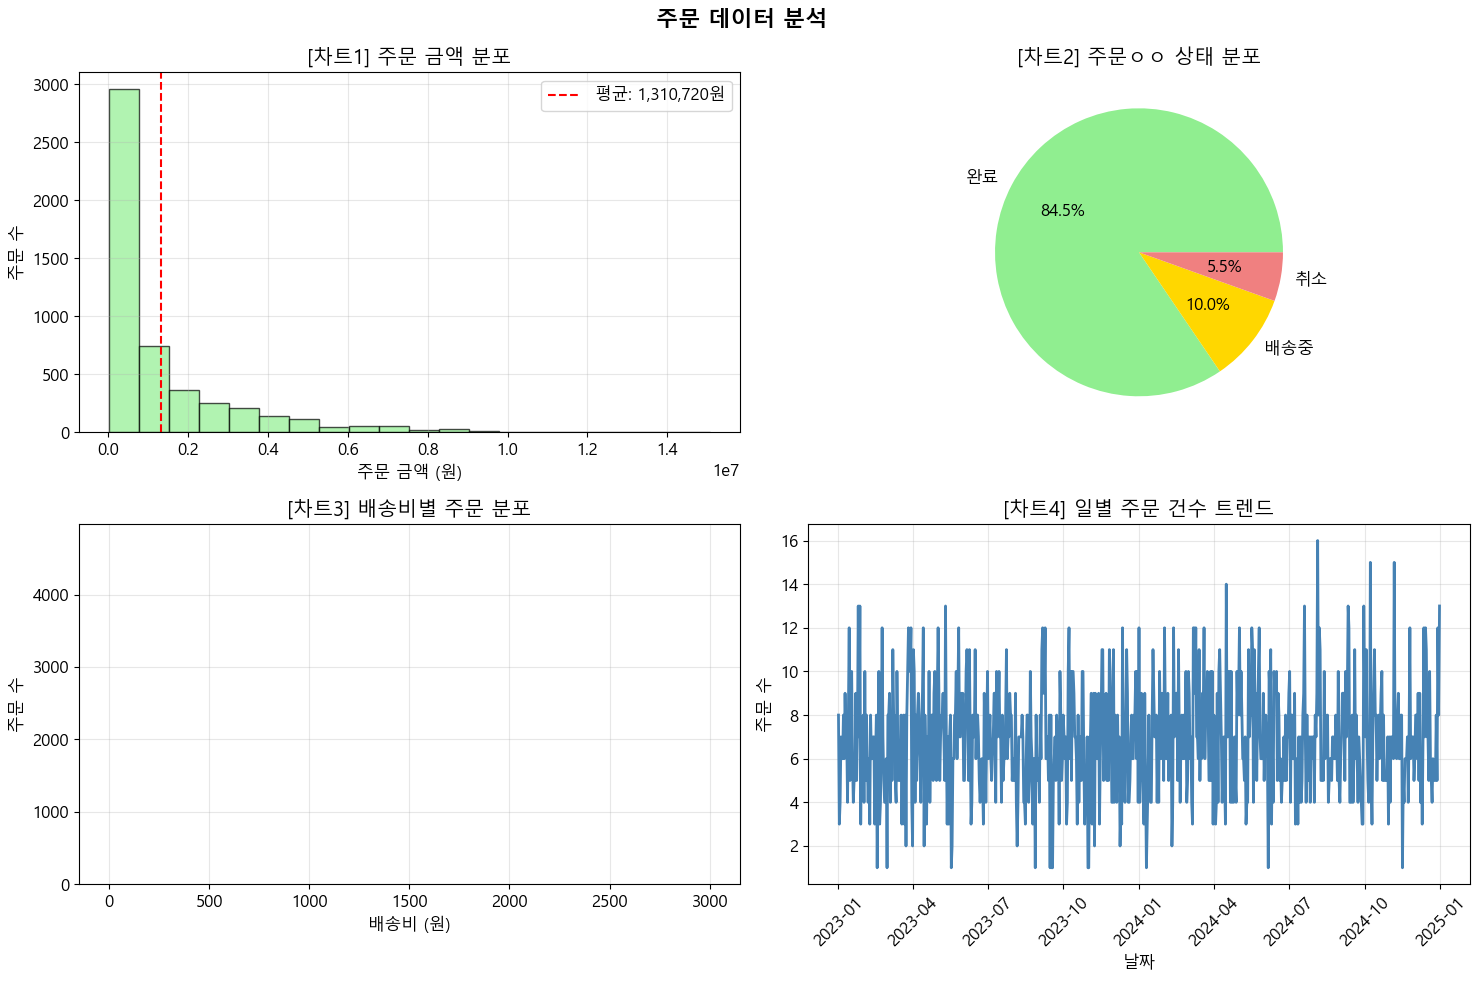


💡 주문 데이터 주요 인사이트:
📊 총 주문 건수: 5,000건
💰 평균 주문 금액: 1,310,720원
💰 총 매출: 6,553,598,932원
💰 평균 주문 소계: 1,310,561원
🚚 평균 배송비: 159원
📦 완료된 주문 비율: 84.5%
🔄 취소된 주문 비율: 5.5%
🚛 배송중 주문 비율: 10.0%
📅 가장 주문이 많은 요일: Monday
📅 가장 주문이 적은 요일: Wednesday


In [10]:
# 주문 데이터 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('주문 데이터 분석', fontsize=16, fontweight='bold')

# 1. 주문 금액 분포
axes[0, 0].hist(orders_df['final_amount'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('[차트1] 주문 금액 분포')
axes[0, 0].set_xlabel('주문 금액 (원)')
axes[0, 0].set_ylabel('주문 수')
axes[0, 0].axvline(orders_df['final_amount'].mean(), color='red', linestyle='--',
                   label=f'평균: {orders_df["final_amount"].mean():,.0f}원')
axes[0, 0].legend()

# 2. 주문 상태 분포
status_counts = orders_df['order_status'].value_counts()
colors = ['lightgreen', 'gold', 'lightcoral', 'lightblue']
axes[0, 1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=colors)
axes[0, 1].set_title('[차트2] 주문ㅇㅇ 상태 분포')

# 3. 배송비 분포
shipping_counts = orders_df['shipping_cost'].value_counts()
axes[1, 0].bar(shipping_counts.index, shipping_counts.values, color='lightsalmon', alpha=0.7)
axes[1, 0].set_title('[차트3] 배송비별 주문 분포')
axes[1, 0].set_xlabel('배송비 (원)')
axes[1, 0].set_ylabel('주문 수')

# 4. 일별 주문 건수 트렌드
# 먼저 order_date를 datetime으로 변환
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
daily_orders = orders_df.groupby(orders_df['order_date'].dt.date).size()
axes[1, 1].plot(daily_orders.index, daily_orders.values, color='steelblue', linewidth=2)
axes[1, 1].set_title('[차트4] 일별 주문 건수 트렌드')
axes[1, 1].set_xlabel('날짜')
axes[1, 1].set_ylabel('주문 수')
axes[1, 1].tick_params(axis='x', rotation=45)

# 💄 레이아웃 조정
plt.tight_layout()
plt.show()

# 💡 주문 데이터 주요 인사이트
print("\n💡 주문 데이터 주요 인사이트:")
print(f"📊 총 주문 건수: {len(orders_df):,}건")
print(f"💰 평균 주문 금액: {orders_df['final_amount'].mean():,.0f}원")
print(f"💰 총 매출: {orders_df['final_amount'].sum():,.0f}원")
print(f"💰 평균 주문 소계: {orders_df['subtotal'].mean():,.0f}원")
print(f"🚚 평균 배송비: {orders_df['shipping_cost'].mean():,.0f}원")
print(f"📦 완료된 주문 비율: {(orders_df['order_status'] == '완료').mean() * 100:.1f}%")
print(f"🔄 취소된 주문 비율: {(orders_df['order_status'] == '취소').mean() * 100:.1f}%")
print(f"🚛 배송중 주문 비율: {(orders_df['order_status'] == '배송중').mean() * 100:.1f}%")

# 📅 주문 패턴 분석
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df['weekday'] = orders_df['order_date'].dt.day_name()
print(f"📅 가장 주문이 많은 요일: {orders_df['weekday'].value_counts().index[0]}")
print(f"📅 가장 주문이 적은 요일: {orders_df['weekday'].value_counts().index[-1]}")


In [11]:
# 📋 주문 상품 데이터 기본 정보
print("📋 주문 상품 데이터 기본 정보")
print("="*50)
print(f"📊 데이터 크기: {order_items_df.shape[0]:,}행 × {order_items_df.shape[1]}열")
print()

# 📋 첫 5행 미리보기
print("📋 데이터 미리보기 (첫 5행):")
print(order_items_df.head())
print()

# 📈 수량 및 가격 관련 통계
print("📈 수량 및 가격 관련 기본 통계:")
print(order_items_df[['quantity', 'unit_price', 'total_price']].describe())
print()

# 🔗 데이터 관계 확인
print("🔗 데이터 관계 확인:")
print(f"고유 주문 수: {order_items_df['order_id'].nunique():,}건")
print(f"고유 상품 수: {order_items_df['product_id'].nunique():,}개")
print(f"평균 주문당 상품 수: {len(order_items_df) / order_items_df['order_id'].nunique():.1f}개")

# 📊 인기 상품 TOP 10
print("\n📊 인기 상품 TOP 10 (주문 건수 기준):")
popular_products = order_items_df.groupby('product_id').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).sort_values('quantity', ascending=False).head(10)

# 상품명 매핑
popular_products_with_names = popular_products.merge(
    products_df[['product_id', 'product_name']], 
    left_index=True, 
    right_on='product_id'
).drop('product_id', axis=1)

print(popular_products_with_names)


📋 주문 상품 데이터 기본 정보
📊 데이터 크기: 6,984행 × 6열

📋 데이터 미리보기 (첫 5행):
       order_id   product_id   product_name  unit_price  quantity  total_price
0  ORD_00000001  PROD_000079  애플 전자기기 상품 79      536000         1       536000
1  ORD_00000001  PROD_000072   삼성 스포츠 상품 72      278000         1       278000
2  ORD_00000002  PROD_000016    삼성 패션 상품 16      226000         2       452000
3  ORD_00000003  PROD_000011   LG 스포츠 상품 11      135900         2       271800
4  ORD_00000004  PROD_000086    삼성 패션 상품 86        9350         2        18700

📈 수량 및 가격 관련 기본 통계:
       quantity  unit_price  total_price
count   6984.00     6984.00      6984.00
mean       1.98   472424.34    938259.44
std        0.81   620515.92   1377086.23
min        1.00     9350.00      9350.00
25%        1.00   120000.00    189000.00
50%        2.00   195000.00    389300.00
75%        3.00   506000.00    936600.00
max        3.00  2957000.00   8871000.00

🔗 데이터 관계 확인:
고유 주문 수: 5,000건
고유 상품 수: 100개
평균 주문당 상품 수: 1.4개

📊 인기 상품 TOP 1

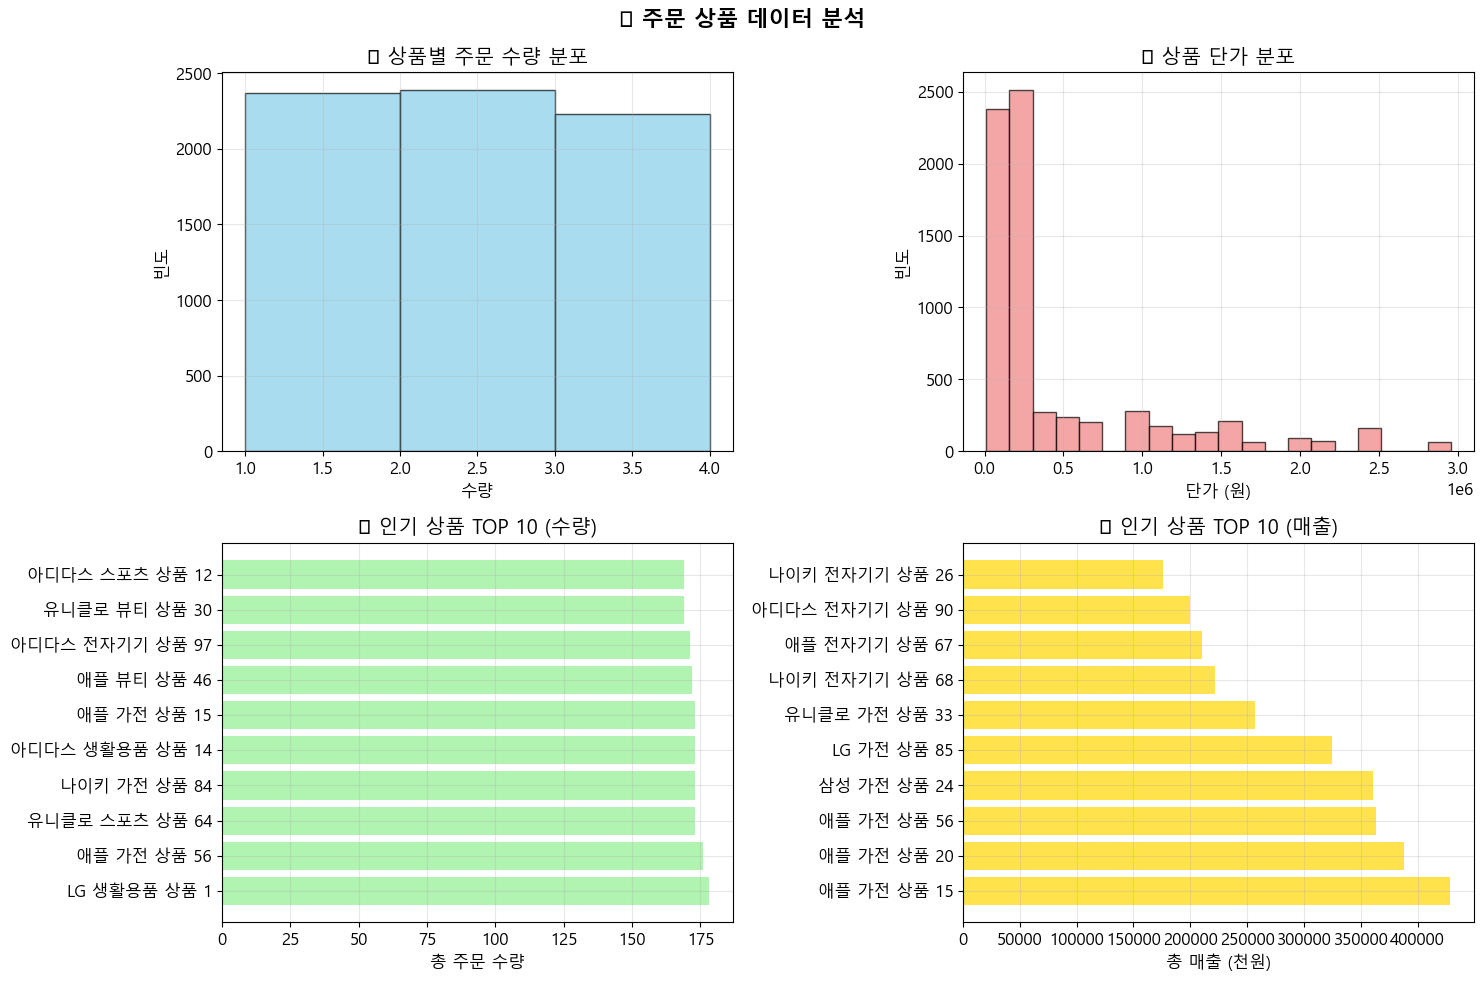


💡 주문 상품 데이터 주요 인사이트:
📊 총 주문 상품 건수: 6,984건
📦 평균 주문 수량: 2.0개
💰 평균 상품 단가: 472,424원
🛒 주문당 평균 상품 종류: 1.4개


In [12]:
# 📋 주문 상품 데이터 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📋 주문 상품 데이터 분석', fontsize=16, fontweight='bold')

# 1️⃣ 상품별 주문 수량 분포
axes[0, 0].hist(order_items_df['quantity'], bins=range(1, order_items_df['quantity'].max()+2), 
                color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('📦 상품별 주문 수량 분포')
axes[0, 0].set_xlabel('수량')
axes[0, 0].set_ylabel('빈도')

# 2️⃣ 상품 단가 분포
axes[0, 1].hist(order_items_df['unit_price'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('💰 상품 단가 분포')
axes[0, 1].set_xlabel('단가 (원)')
axes[0, 1].set_ylabel('빈도')

# 3️⃣ 인기 상품 TOP 10 (수량 기준)
top_products_qty = order_items_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
product_names = [products_df[products_df['product_id'] == pid]['product_name'].iloc[0][:15] + '...' 
                if len(products_df[products_df['product_id'] == pid]['product_name'].iloc[0]) > 15
                else products_df[products_df['product_id'] == pid]['product_name'].iloc[0]
                for pid in top_products_qty.index]

axes[1, 0].barh(range(len(top_products_qty)), top_products_qty.values, color='lightgreen', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_products_qty)))
axes[1, 0].set_yticklabels(product_names)
axes[1, 0].set_title('🏆 인기 상품 TOP 10 (수량)')
axes[1, 0].set_xlabel('총 주문 수량')

# 4️⃣ 인기 상품 TOP 10 (매출 기준)
top_products_sales = order_items_df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(10)
product_names_sales = [products_df[products_df['product_id'] == pid]['product_name'].iloc[0][:15] + '...' 
                      if len(products_df[products_df['product_id'] == pid]['product_name'].iloc[0]) > 15
                      else products_df[products_df['product_id'] == pid]['product_name'].iloc[0]
                      for pid in top_products_sales.index]

axes[1, 1].barh(range(len(top_products_sales)), top_products_sales.values/1000, color='gold', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_products_sales)))
axes[1, 1].set_yticklabels(product_names_sales)
axes[1, 1].set_title('💎 인기 상품 TOP 10 (매출)')
axes[1, 1].set_xlabel('총 매출 (천원)')

# 💄 레이아웃 조정
plt.tight_layout()
plt.show()

# 💡 주문 상품 데이터 주요 인사이트
print("\n💡 주문 상품 데이터 주요 인사이트:")
print(f"📊 총 주문 상품 건수: {len(order_items_df):,}건")
print(f"📦 평균 주문 수량: {order_items_df['quantity'].mean():.1f}개")
print(f"💰 평균 상품 단가: {order_items_df['unit_price'].mean():,.0f}원")
print(f"🛒 주문당 평균 상품 종류: {len(order_items_df) / len(orders_df):.1f}개")


In [13]:
# 🔍 데이터 관계 분석
print("🔍 데이터 관계 분석")
print("="*50)

# 📊 고객별 주문 분석
customer_orders = orders_df.groupby('customer_id').agg({
    'order_id': 'count',
    'final_amount': ['sum', 'mean']
}).round(2)

customer_orders.columns = ['주문_건수', '총_구매금액', '평균_주문금액']

print("👥 고객별 주문 패턴:")
print(f"평균 고객당 주문 건수: {customer_orders['주문_건수'].mean():.1f}건")
print(f"평균 고객당 총 구매금액: {customer_orders['총_구매금액'].mean():,.0f}원")
print(f"고객당 평균 주문금액: {customer_orders['평균_주문금액'].mean():,.0f}원")
print()

# 📦 카테고리별 매출 분석
category_sales = order_items_df.merge(products_df[['product_id', 'category']], on='product_id') \
                               .groupby('category')['total_price'].sum().sort_values(ascending=False)

print("🏷️ 카테고리별 매출 순위:")
for i, (category, sales) in enumerate(category_sales.head().items(), 1):
    print(f"{i}. {category}: {sales:,.0f}원 ({sales/category_sales.sum()*100:.1f}%)")
print()

# 🗺️ 지역별 주문 패턴 분석
region_analysis = orders_df.merge(customers_df[['customer_id', 'region']], on='customer_id') \
                           .groupby('region').agg({
                               'order_id': 'count',
                               'final_amount': 'sum'
                           }).sort_values('final_amount', ascending=False)

print("🗺️ 지역별 주문 패턴:")
for region, data in region_analysis.iterrows():
    print(f"{region}: {data['order_id']}건, {data['final_amount']:,.0f}원")
print()

# 🎯 고객 세그먼트별 구매 행동
segment_analysis = orders_df.merge(customers_df[['customer_id', 'segment']], on='customer_id') \
                            .groupby('segment').agg({
                                'order_id': 'count',
                                'final_amount': ['sum', 'mean']
                            }).round(2)

segment_analysis.columns = ['주문_건수', '총_매출', '평균_주문금액']

print("🎯 고객 세그먼트별 구매 행동:")
for segment, data in segment_analysis.iterrows():
    print(f"{segment}: {data['주문_건수']}건, 총 {data['총_매출']:,.0f}원, 평균 {data['평균_주문금액']:,.0f}원")


🔍 데이터 관계 분석
👥 고객별 주문 패턴:
평균 고객당 주문 건수: 5.0건
평균 고객당 총 구매금액: 6,613,117원
고객당 평균 주문금액: 1,317,923원

🏷️ 카테고리별 매출 순위:
1. 가전: 3,082,184,200원 (47.0%)
2. 전자기기: 2,079,895,000원 (31.7%)
3. 스포츠: 390,307,300원 (6.0%)
4. 뷰티: 389,663,350원 (5.9%)
5. 패션: 333,091,350원 (5.1%)

🗺️ 지역별 주문 패턴:
강원: 743건, 992,193,507원
대구: 650건, 906,154,861원
인천: 641건, 852,199,271원
부산: 663건, 842,275,012원
서울: 633건, 782,165,312원
경기: 563건, 778,593,275원
광주: 535건, 761,622,830원
대전: 572건, 638,394,864원

🎯 고객 세그먼트별 구매 행동:
Budget: 1884.0건, 총 2,574,387,757원, 평균 1,366,448원
Premium: 811.0건, 총 1,032,870,303원, 평균 1,273,576원
Regular: 2060.0건, 총 2,608,894,085원, 평균 1,266,453원
VIP: 245.0건, 총 337,446,787원, 평균 1,377,334원


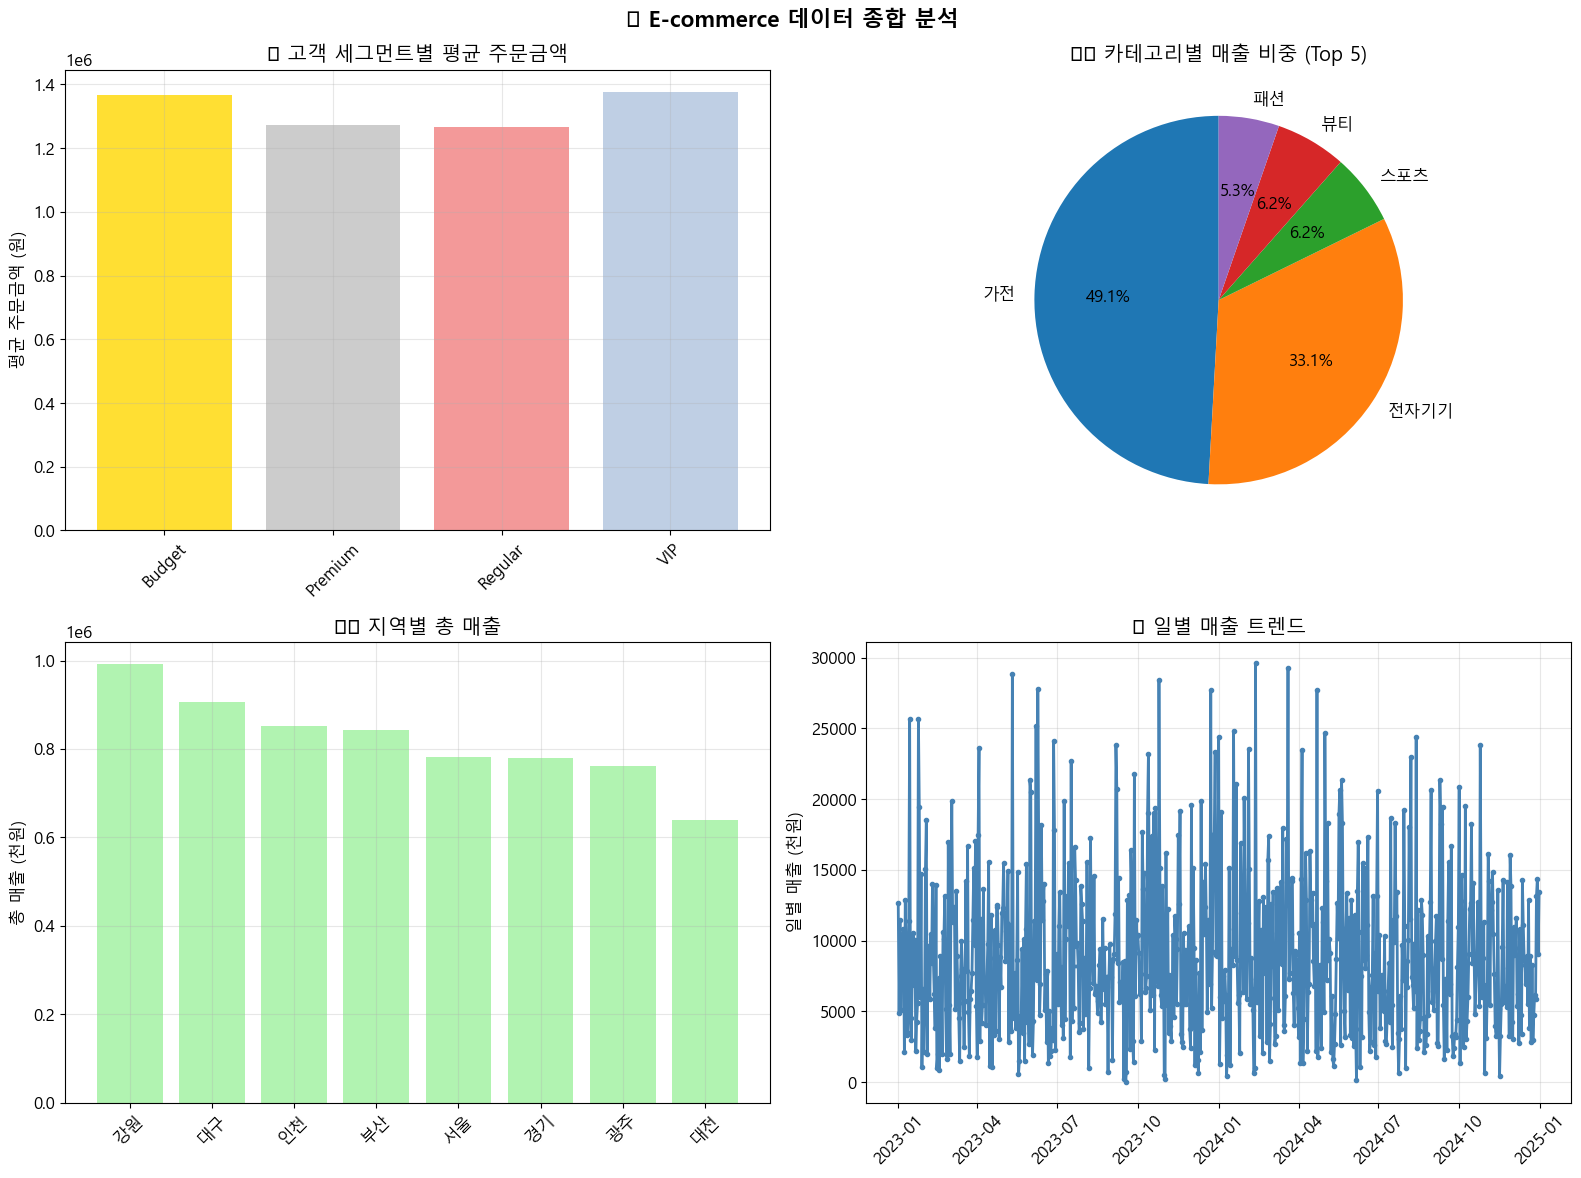


📊 핵심 성과 지표 (KPI) 요약
💰 총 매출: 6,553,598,932원
🛒 총 주문 건수: 5,000건
💳 평균 주문 금액 (AOV): 1,310,720원
👥 총 고객 수: 1,000명
📊 고객당 평균 주문 건수: 5.0건
📊 고객당 평균 생애 가치 (CLV): 6,553,599원

📦 총 상품 수: 100개
📈 판매된 상품 수: 100개
📊 상품 판매율: 100.0%


KeyError: 'status'

In [14]:
# 🔍 종합 데이터 관계 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🔍 E-commerce 데이터 종합 분석', fontsize=16, fontweight='bold')

# 1️⃣ 고객 세그먼트별 평균 주문금액
axes[0, 0].bar(segment_analysis.index, segment_analysis['평균_주문금액'], 
               color=['gold', 'silver', 'lightcoral', 'lightsteelblue'], alpha=0.8)
axes[0, 0].set_title('🎯 고객 세그먼트별 평균 주문금액')
axes[0, 0].set_ylabel('평균 주문금액 (원)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2️⃣ 카테고리별 매출 비중
axes[0, 1].pie(category_sales.head().values, labels=category_sales.head().index, 
               autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('🏷️ 카테고리별 매출 비중 (Top 5)')

# 3️⃣ 지역별 총 매출
axes[1, 0].bar(region_analysis.index, region_analysis['final_amount']/1000, 
               color='lightgreen', alpha=0.7)
axes[1, 0].set_title('🗺️ 지역별 총 매출')
axes[1, 0].set_ylabel('총 매출 (천원)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4️⃣ 일별 매출 트렌드
daily_sales = orders_df.groupby(orders_df['order_date'].dt.date)['final_amount'].sum()
axes[1, 1].plot(daily_sales.index, daily_sales.values/1000, 
                color='steelblue', linewidth=2, marker='o', markersize=3)
axes[1, 1].set_title('📈 일별 매출 트렌드')
axes[1, 1].set_ylabel('일별 매출 (천원)')
axes[1, 1].tick_params(axis='x', rotation=45)

# 💄 레이아웃 조정
plt.tight_layout()
plt.show()

# 📊 핵심 성과 지표 (KPI) 요약
print("\n📊 핵심 성과 지표 (KPI) 요약")
print("="*50)

# 전체 매출 지표
total_revenue = orders_df['final_amount'].sum()
total_orders = len(orders_df)
avg_order_value = orders_df['final_amount'].mean()
total_customers = customers_df['customer_id'].nunique()

print(f"💰 총 매출: {total_revenue:,.0f}원")
print(f"🛒 총 주문 건수: {total_orders:,}건")
print(f"💳 평균 주문 금액 (AOV): {avg_order_value:,.0f}원")
print(f"👥 총 고객 수: {total_customers:,}명")
print(f"📊 고객당 평균 주문 건수: {total_orders/total_customers:.1f}건")
print(f"📊 고객당 평균 생애 가치 (CLV): {total_revenue/total_customers:,.0f}원")

# 상품 지표
total_products = len(products_df)
sold_products = order_items_df['product_id'].nunique()
product_sell_through = sold_products / total_products * 100

print(f"\n📦 총 상품 수: {total_products:,}개")
print(f"📈 판매된 상품 수: {sold_products:,}개")
print(f"📊 상품 판매율: {product_sell_through:.1f}%")

# 주문 상태별 통계
completed_orders = (orders_df['status'] == 'completed').sum()
completion_rate = completed_orders / total_orders * 100

print(f"\n✅ 완료된 주문: {completed_orders:,}건")
print(f"📊 주문 완료율: {completion_rate:.1f}%")


In [ ]:
# 💾 처리된 데이터 저장
import os

# 처리된 데이터 디렉토리 확인/생성
processed_dir = Path('data/processed')
processed_dir.mkdir(parents=True, exist_ok=True)

print("💾 처리된 데이터 저장 중...")

# 🔍 분석 결과 데이터프레임 생성
analysis_results = {
    'customer_summary': customer_orders,
    'category_sales': category_sales.to_frame('total_sales'),
    'region_analysis': region_analysis,
    'segment_analysis': segment_analysis
}

# 📊 요약 통계 저장
summary_stats = {
    'total_revenue': total_revenue,
    'total_orders': total_orders,
    'avg_order_value': avg_order_value,
    'total_customers': total_customers,
    'total_products': total_products,
    'sold_products': sold_products,
    'completion_rate': completion_rate
}

# CSV 파일로 저장
for name, df in analysis_results.items():
    file_path = processed_dir / f"{name}.csv"
    df.to_csv(file_path, index=True, encoding='utf-8-sig')
    print(f"✅ {name}.csv 저장 완료")

# 요약 통계를 JSON으로 저장
import json
summary_path = processed_dir / "summary_statistics.json"
with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(summary_stats, f, ensure_ascii=False, indent=2)
print(f"✅ summary_statistics.json 저장 완료")

print(f"\n📁 저장 위치: {processed_dir.absolute()}")

# 저장된 파일 목록 확인
print("\n📄 저장된 분석 파일 목록:")
for file in processed_dir.glob("*"):
    file_size = file.stat().st_size / 1024  # KB
    print(f"  📄 {file.name}: {file_size:.1f} KB")
